In [ ]:
train_dir = "/content/drive/MyDrive/tensorflow projekt/MaleFemale/Male and Female face dataset"
test_dir = "/content/drive/MyDrive/tensorflow projekt/MaleFemale/Male and Female face dataset test"
SHAPE = (224,224)
BATCHES = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True

)


In [ ]:
train_data_augmented = train_data_gen.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')
test_data_augmented = test_data_gen.flow_from_directory(test_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')

Found 3891 images belonging to 2 classes.
Found 1524 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
import tensorflow_hub as hub

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                         trainable=False,
                                         name='feature_extraction_layer',
                                         input_shape=SHAPE + (3,))

model1 = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1, activation='sigmoid', name='output_layer')  # Change the number of units to 1
])

model1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
mod1_hist = model1.fit(train_data_augmented,
                       epochs=7,
                       steps_per_epoch=len(train_data_augmented)//2,
                       validation_data=test_data_augmented,
                       validation_steps=len(test_data_augmented))

Epoch 1/7
61/61 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.8202

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


61/61 [==============================] - 1372s 22s/step - loss: 0.4564 - accuracy: 0.8202 - val_loss: 0.3884 - val_accuracy: 0.8707
Epoch 2/7
61/61 [==============================] - 539s 9s/step - loss: 0.2843 - accuracy: 0.9037 - val_loss: 0.3108 - val_accuracy: 0.8786
Epoch 3/7
61/61 [==============================] - 421s 7s/step - loss: 0.2505 - accuracy: 0.9093 - val_loss: 0.2752 - val_accuracy: 0.8976
Epoch 4/7
61/61 [==============================] - 382s 6s/step - loss: 0.2300 - accuracy: 0.9103 - val_loss: 0.2543 - val_accuracy: 0.8996
Epoch 5/7
61/61 [==============================] - 421s 7s/step - loss: 0.2109 - accuracy: 0.9232 - val_loss: 0.2324 - val_accuracy: 0.9134
Epoch 6/7
61/61 [==============================] - 384s 6s/step - loss: 0.1855 - accuracy: 0.9349 - val_loss: 0.2221 - val_accuracy: 0.9101
Epoch 7/7
61/61 [==============================] - 382s 6s/step - loss: 0.1776 - accuracy: 0.9402 - val_loss: 0.2081 - val_accuracy: 0.9167


In [ ]:



import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();



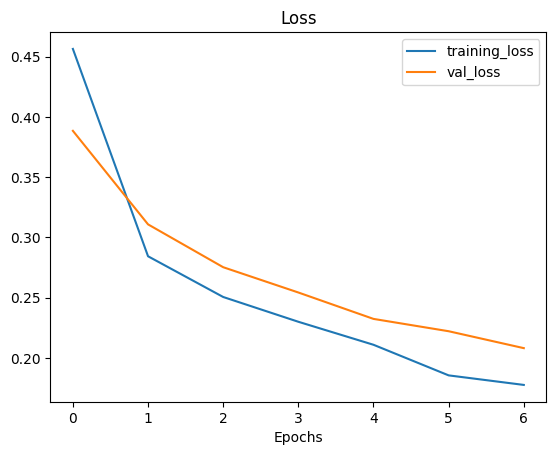

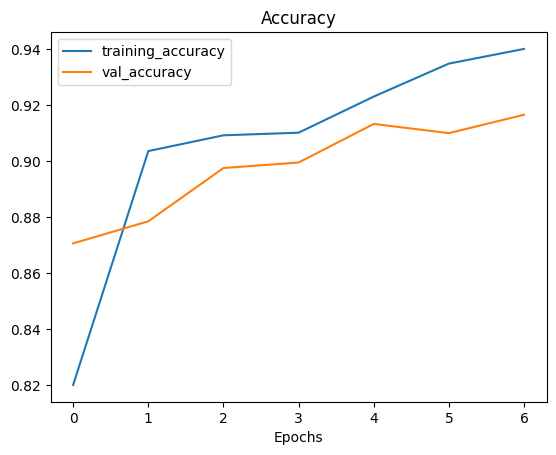

In [ ]:
plot_loss_curves(mod1_hist)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
train_data_gen2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_dir2 = "/content/drive/MyDrive/tensorflow projekt/face_age2"
SHAPE = (224,224)
BATCHES = 32

In [ ]:
train_data_augmented = train_data_gen2.flow_from_directory(train_dir2,
                                                                   target_size=SHAPE,
                                                                   batch_size=BATCHES,
                                                                   class_mode='categorical')

Found 3948 images belonging to 11 classes.


In [ ]:
from tensorflow.keras import layers
import tensorflow_hub as hub

efficientnet_url2 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:

feature_extractor_layer2 = hub.KerasLayer(efficientnet_url2,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=SHAPE+(3,))
model2 = tf.keras.Sequential([
    feature_extractor_layer2,
    layers.Dense(11, activation='softmax', name='output_layer')])


In [ ]:
feature_extractor_layer3 = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='resnet_url',
                                           input_shape=SHAPE+(3,))
model3 = tf.keras.Sequential([
    feature_extractor_layer3,
    layers.Dense(11, activation='softmax', name='output_layer')])

In [ ]:
model2.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history2 = model2.fit(train_data_augmented,
                                  epochs=5,  # Reduce the number of epochs
                                  steps_per_epoch=len(data_augumented)//2)

resnet_history3 = model3.fit(train_data_augmented,
                                  epochs=5,  # Reduce the number of epochs
                                  steps_per_epoch=len(data_augumented)//2)

NameError: name 'data_augumented' is not defined

In [ ]:
model2.save('/content/drive/MyDrive/Modele/AgeRec1')
model3.save('/content/drive/MyDrive/Modele/AgeRec2')
model1.save('/content/drive/MyDrive/Modele/GenderRec')